In [1]:
from graphviz import Digraph  
import matplotlib.pyplot as plt
import matplotlib.style as mls
mls.use('ggplot')

def show_map(save_path):
    image=plt.imread(save_path+'.png')
    h,w=image.shape[:2]
    plt.figure(figsize=(w*2/plt.rcParams['figure.dpi'], h*2/plt.rcParams['figure.dpi']))
    plt.imshow(image,aspect='auto')
    plt.axis('off')
    plt.show()

In [86]:
def prepare_text(text,max_len=10):
    new_text=[]
    while True:
        if len(text)>max_len:
            new_text.append(text[:max_len])
            text=text[max_len:]
        else:
            new_text.append(text+' '*(max_len*2-2*len(text)))
            break
    return '\\n'.join(new_text)
print(prepare_text('hello world'))

hello worl\nd                  


## Bubble Map

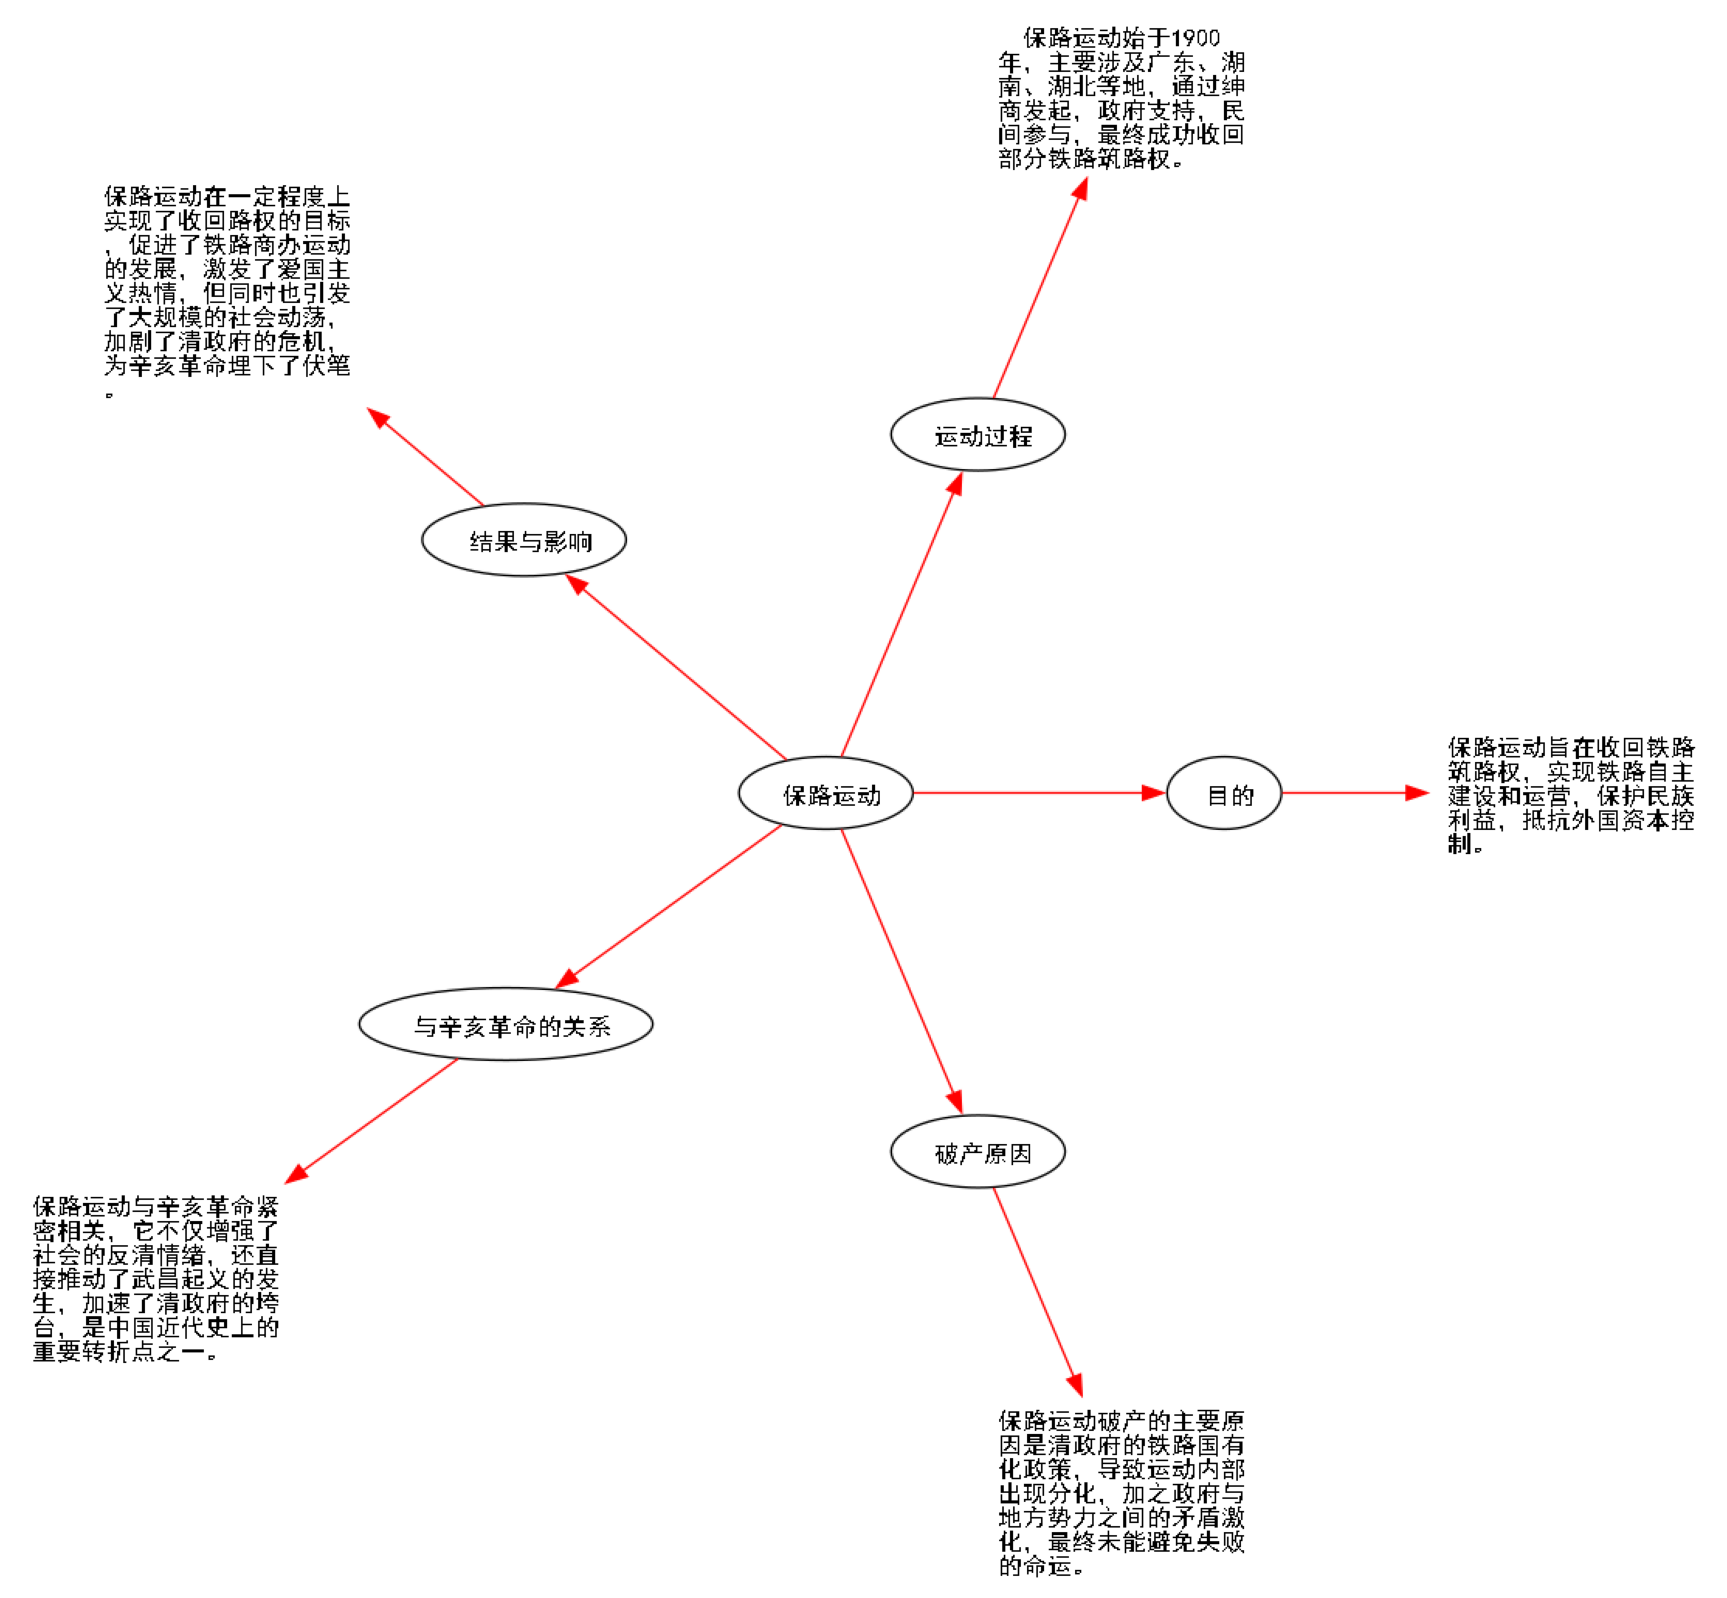

In [87]:
input1="""
## 中心词: 保路运动

### 属性1: 目的
#### 属性描述: 保路运动旨在收回铁路筑路权，实现铁路自主建设和运营，保护民族利益，抵抗外国资本控制。

### 属性2: 运动过程
#### 属性描述: 保路运动始于1900年，主要涉及广东、湖南、湖北等地，通过绅商发起，政府支持，民间参与，最终成功收回部分铁路筑路权。

### 属性3: 结果与影响
#### 属性描述: 保路运动在一定程度上实现了收回路权的目标，促进了铁路商办运动的发展，激发了爱国主义热情，但同时也引发了大规模的社会动荡，加剧了清政府的危机，为辛亥革命埋下了伏笔。

### 属性4: 与辛亥革命的关系
#### 属性描述: 保路运动与辛亥革命紧密相关，它不仅增强了社会的反清情绪，还直接推动了武昌起义的发生，加速了清政府的垮台，是中国近代史上的重要转折点之一。

### 属性5: 破产原因
#### 属性描述: 保路运动破产的主要原因是清政府的铁路国有化政策，导致运动内部出现分化，加之政府与地方势力之间的矛盾激化，最终未能避免失败的命运。<|im_end|>
"""
def draw_Bubble_Map(input,save_path='气泡图'):
    input=input.replace('<|im_end|>','')
    title='气泡图'
    dot = Digraph(comment=title,format='png',engine='circo') 
    dot.graph_attr['rankdir'] = 'LR'
    #dot.graph_attr['splines'] = 'line'
    dot.attr('node', fontname='simhei', fontsize='12')  # 设置节点默认字体  
    dot.attr('edge', fontname='simhei', fontsize='6')  # 设置边默认字体（如果边上有标签）
    attribute_list=input.split('\n\n')
    #print(attribute_list)
    root=attribute_list[0].split(':')[-1].replace('\n','')
    dot.node(root,root)
    for i,attribute in enumerate(attribute_list[1:]):
        attribute=attribute.replace('\n','')
        attribute_name=attribute.split('#### ')[0].split(':')[-1]
        description=attribute.split('#### ')[-1].split(':')[-1]
        description=prepare_text(description.replace(' ',''))
        #print(attribute_name,description)
        dot.node(attribute_name,attribute_name)
        dot.node(attribute_name+'描述',description,shape='none')
        dot.edge(root,attribute_name,color='red')
        dot.edge(attribute_name,attribute_name+'描述',color='red')
    dot.render(save_path, view=False, cleanup=True)

save_path= 'graph/bublle_map'  
draw_Bubble_Map(input1,save_path)
show_map(save_path)

## Double Bubble Map

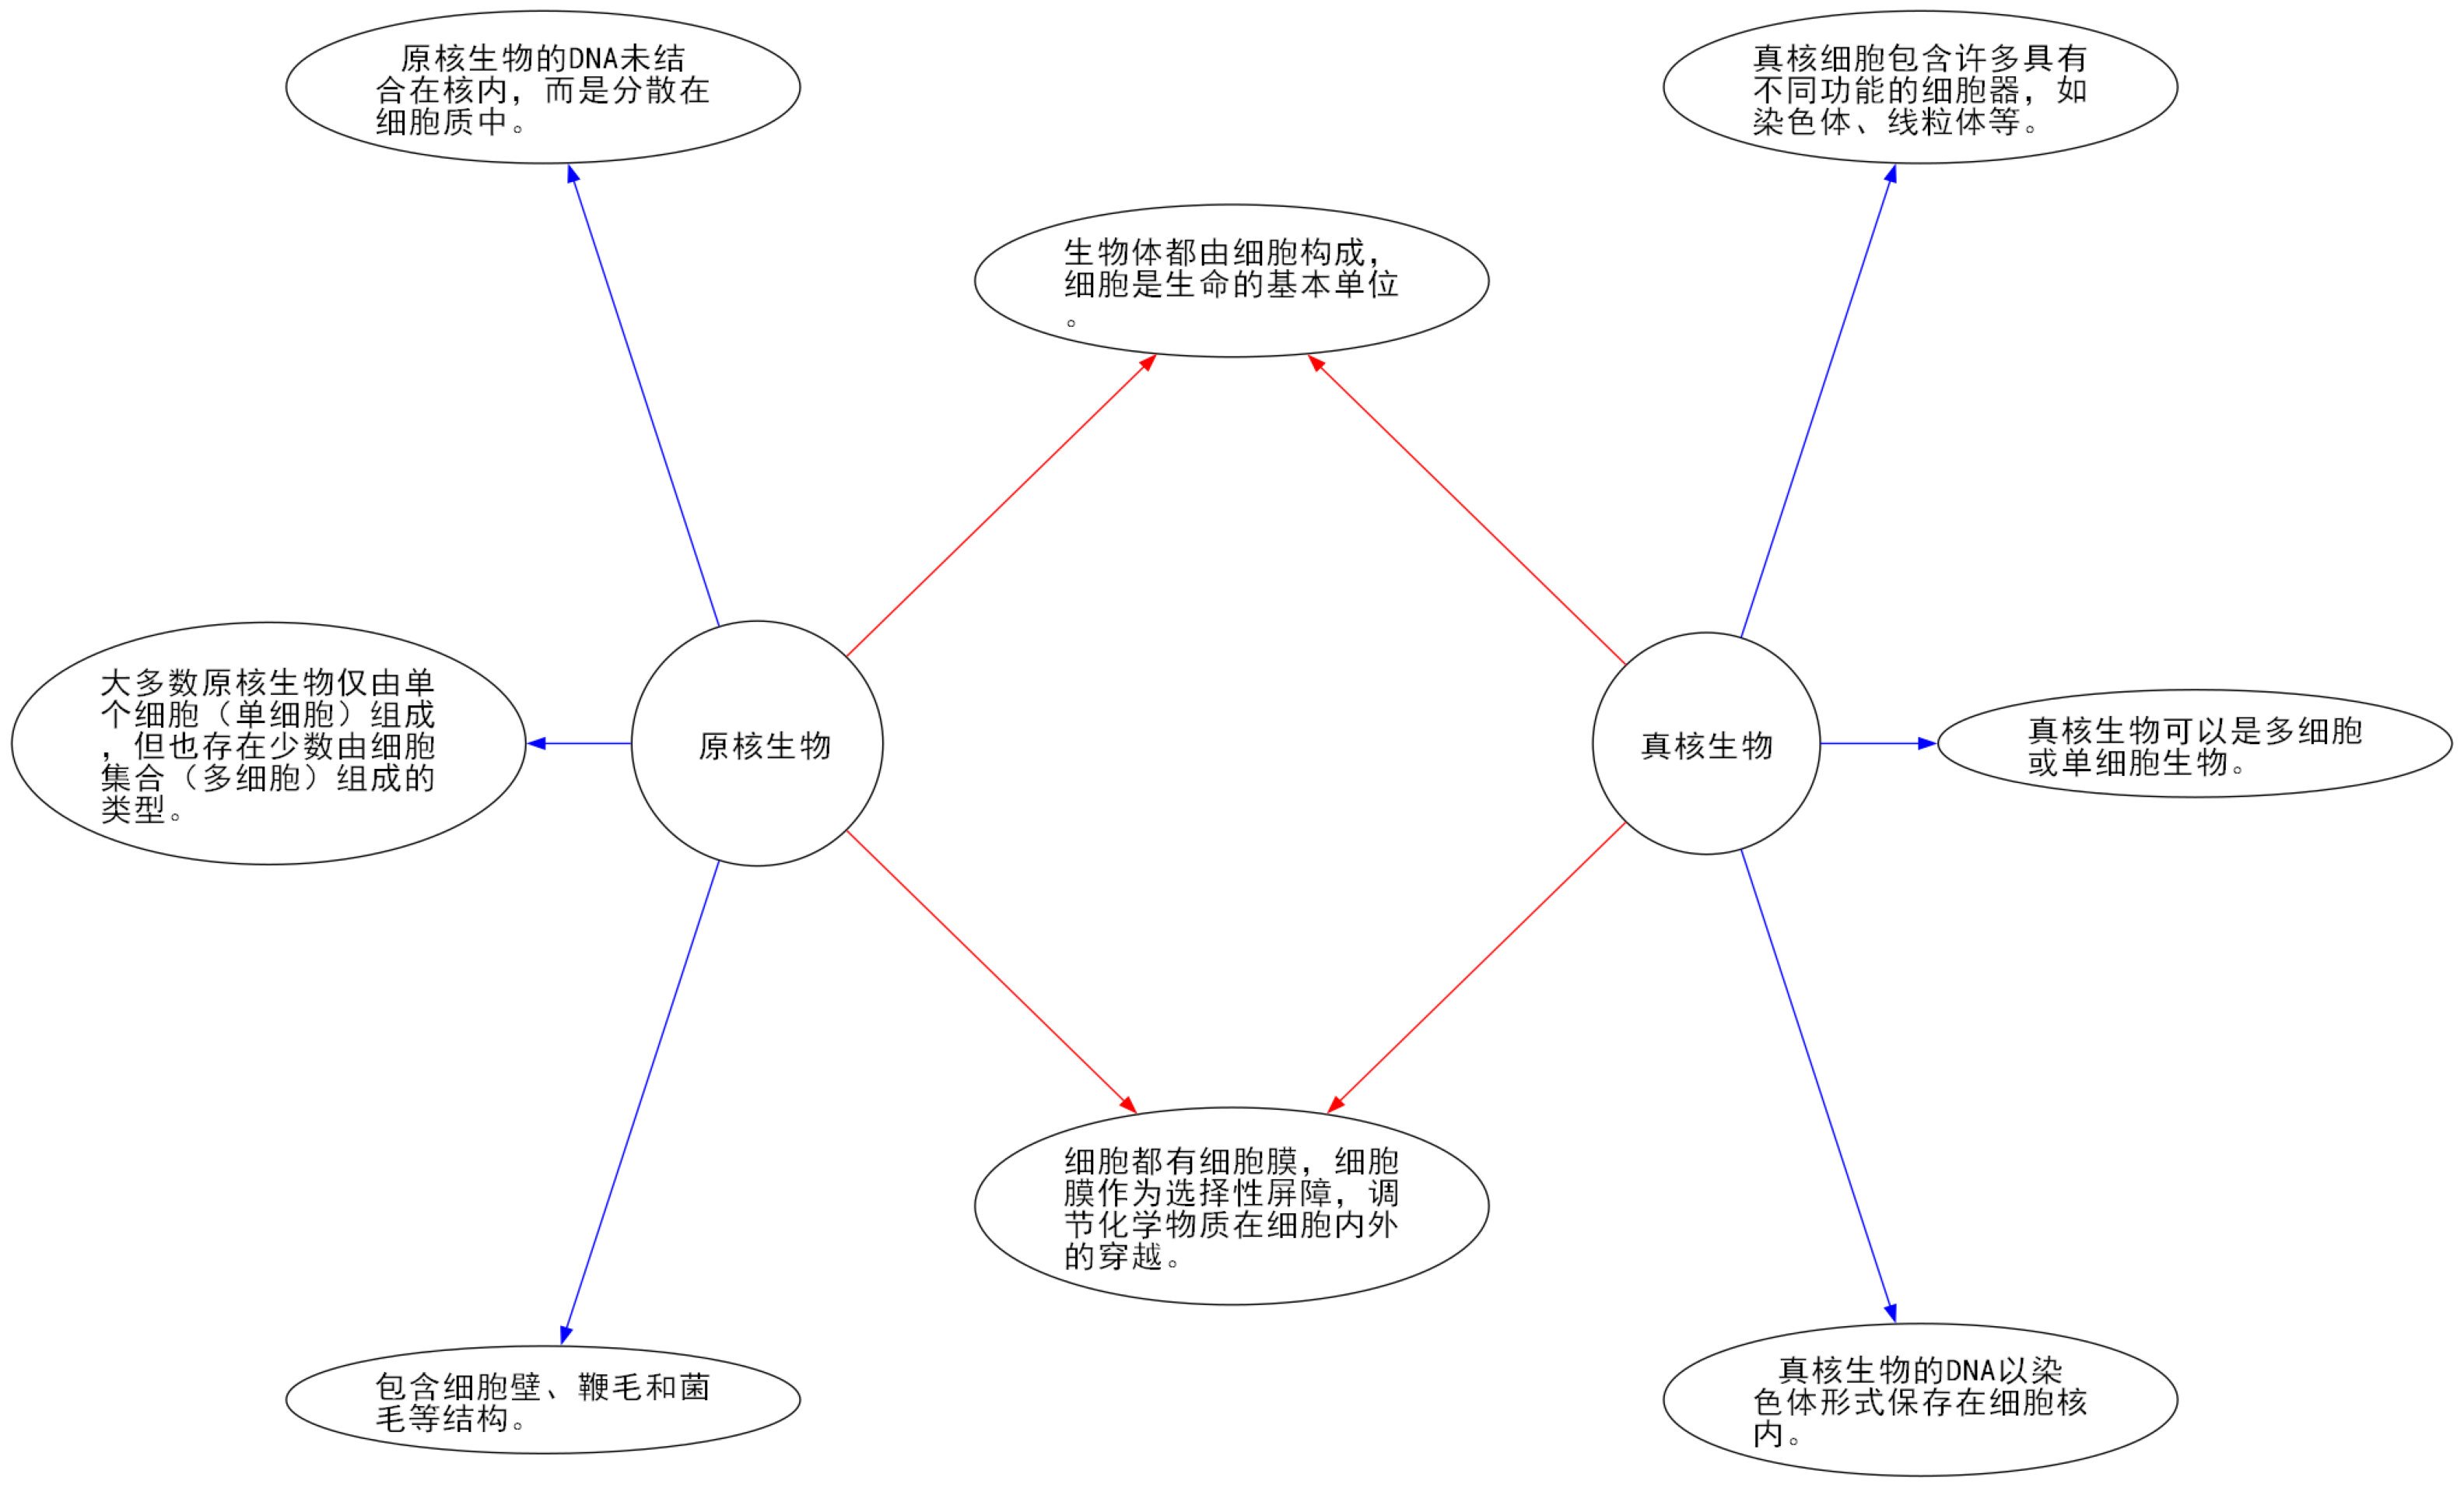

In [88]:
input2="""
## 比较对象: 原核生物，真核生物
### 相同点:
#### 相同点1: 生物体都由细胞构成，细胞是生命的基本单位。
#### 相同点2: 细胞都有细胞膜，细胞膜作为选择性屏障，调节化学物质在细胞内外的穿越。

### 原核生物独有的特点:
#### 特点1: 原核生物的DNA未结合在核内，而是分散在细胞质中。
#### 特点2: 大多数原核生物仅由单个细胞（单细胞）组成，但也存在少数由细胞集合（多细胞）组成的类型。
#### 特点3: 包含细胞壁、鞭毛和菌毛等结构。

### 真核生物独有的特点:
#### 特点1: 真核生物的DNA以染色体形式保存在细胞核内。
#### 特点2: 真核生物可以是多细胞或单细胞生物。
#### 特点3: 真核细胞包含许多具有不同功能的细胞器，如染色体、线粒体等。<|im_end|>
"""

def draw_double_Bubble_Map(input,save_path='双泡图'):
    input=input.replace('<|im_end|>','').replace('\n\n','\n')
    title='双泡图'
    dot = Digraph(comment=title,format='png',engine='circo') 
    dot.graph_attr['mindist'] = '2.0' 
    #dot.graph_attr['rankdir'] = 'LR'
    #dot.graph_attr['splines'] = 'line'  # 设置节点间的连接线为直线
    dot.attr('node', fontname='simhei', fontsize='20')  # 设置节点默认字体  
    dot.attr('edge', fontname='simhei', fontsize='10')  # 设置边默认字体（如果边上有标签）
    attribute_list=input.split('\n### ')
    objects=attribute_list[0].split(':')[-1].replace('\n','').split('，')
    root1=objects[0]
    root2=objects[1]
    dot.node(root1,root1,shape='circle')
    dot.node(root2,root2,shape='circle')
    commonds=attribute_list[1].split('\n')[1:]
    for i,commond in enumerate(commonds):
        commond_name=commond.split(':')[-1]
        commond_name=prepare_text(commond_name.replace(' ',''))
        dot.node(commond_name,commond_name)
        dot.edge(root1,commond_name,color='red')
        dot.edge(root2,commond_name,color='red')

    features1=attribute_list[2].split('\n')[1:]
    for i,feature in enumerate(features1):
        feature_name=feature.split(':')[-1]
        feature_name=prepare_text(feature_name.replace(' ',''))
        dot.node(feature_name,feature_name)
        dot.edge(root1,feature_name,color='blue')

    features2=attribute_list[3].split('\n')[1:-1]
    for i,feature in enumerate(features2):
        feature_name=feature.split(':')[-1] 
        feature_name=prepare_text(feature_name.replace(' ',''))
        dot.node(feature_name,feature_name)
        dot.edge(root2,feature_name,color='blue')
    dot.render(save_path, view=False,cleanup=True)

save_path='graph/double_bubble_map'   
draw_double_Bubble_Map(input2,save_path)
show_map(save_path)

## Tree Map

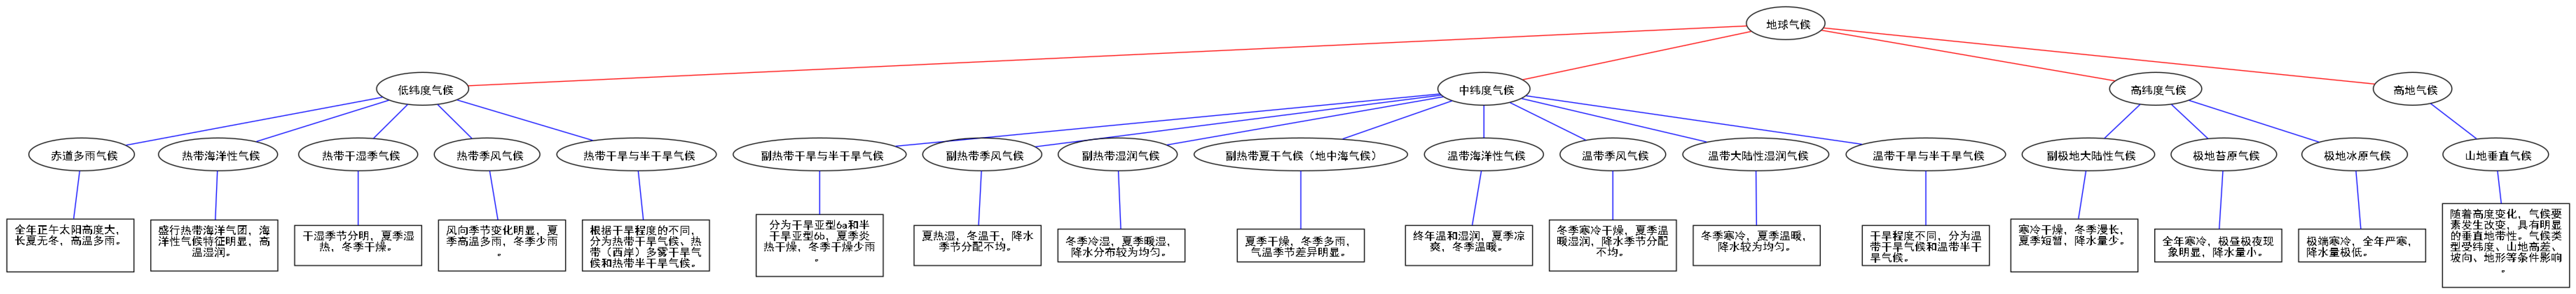

In [126]:
input3="""
## 一级类别: 地球气候

### 二级类别1: 低纬度气候
- **赤道多雨气候**: 全年正午太阳高度大，长夏无冬，高温多雨。
- **热带海洋性气候**: 盛行热带海洋气团，海洋性气候特征明显，高温湿润。
- **热带干湿季气候**: 干湿季节分明，夏季湿热，冬季干燥。
- **热带季风气候**: 风向季节变化明显，夏季高温多雨，冬季少雨。
- **热带干旱与半干旱气候**: 根据干旱程度的不同，分为热带干旱气候、热带（西岸）多雾干旱气候和热带半干旱气候。

### 二级类别2: 中纬度气候
- **副热带干旱与半干旱气候**: 分为干旱亚型6a和半干旱亚型6b，夏季炎热干燥，冬季干燥少雨。
- **副热带季风气候**: 夏热湿，冬温干，降水季节分配不均。
- **副热带湿润气候**: 冬季冷湿，夏季暖湿，降水分布较为均匀。
- **副热带夏干气候（地中海气候）**: 夏季干燥，冬季多雨，气温季节差异明显。
- **温带海洋性气候**: 终年温和湿润，夏季凉爽，冬季温暖。
- **温带季风气候**: 冬季寒冷干燥，夏季温暖湿润，降水季节分配不均。
- **温带大陆性湿润气候**: 冬季寒冷，夏季温暖，降水较为均匀。
- **温带干旱与半干旱气候**: 干旱程度不同，分为温带干旱气候和温带半干旱气候。

### 二级类别3: 高纬度气候
- **副极地大陆性气候**: 寒冷干燥，冬季漫长，夏季短暂，降水量少。
- **极地苔原气候**: 全年寒冷，极昼极夜现象明显，降水量小。
- **极地冰原气候**: 极端寒冷，全年严寒，降水量极低。

### 二级类别4: 高地气候
- **山地垂直气候**: 随着高度变化，气候要素发生改变，具有明显的垂直地带性。气候类型受纬度、山地高差、坡向、地形等条件影响。<|im_end|>
"""
def draw_tree_map(input,save_path='树状图'):
    input=input.replace('<|im_end|>','').replace('\n\n','\n').replace('**','')
    title='树状图'
    dot = Digraph(comment=title,format='png',engine='dot') 
    dot.graph_attr['rankdir'] = 'LR'
    dot.graph_attr['splines'] = 'line'  # 设置节点间的连接线为直线
    dot.attr('node', fontname='simhei', fontsize='12')  # 设置节点默认字体  
    dot.attr('edge', fontname='simhei', fontsize='6')  # 设置边默认字体（如果边上有标签）
    attribute_list=input.split('\n### ')
    root=attribute_list[0].split(':')[-1]
    dot.node(root,root)
    attribute_list=attribute_list[1:]
    for i,attribute in enumerate(attribute_list):
        attribute_name=attribute.split('-')[0].split(':')[-1]
        dot.node(attribute_name,attribute_name)
        dot.edge(root,attribute_name,color='red',arrowhead='none')
        features=attribute.split('-')[1:]
        for j,feature in enumerate(features):
            feature_name=feature.split(':')[0]
            description=feature.split(':')[-1]
            description=prepare_text(description.replace(' ',''))
            dot.node(description,description,shape='box')
            dot.node(feature_name,feature_name)
            dot.edge(attribute_name,feature_name,color='blue',arrowhead='none')
            dot.edge(feature_name,description,color='blue',arrowhead='none')
    dot.render(save_path, view=False,cleanup=True)
save_path='graph/tree_map'
draw_tree_map(input3,save_path)
show_map(save_path)


## Brace Map

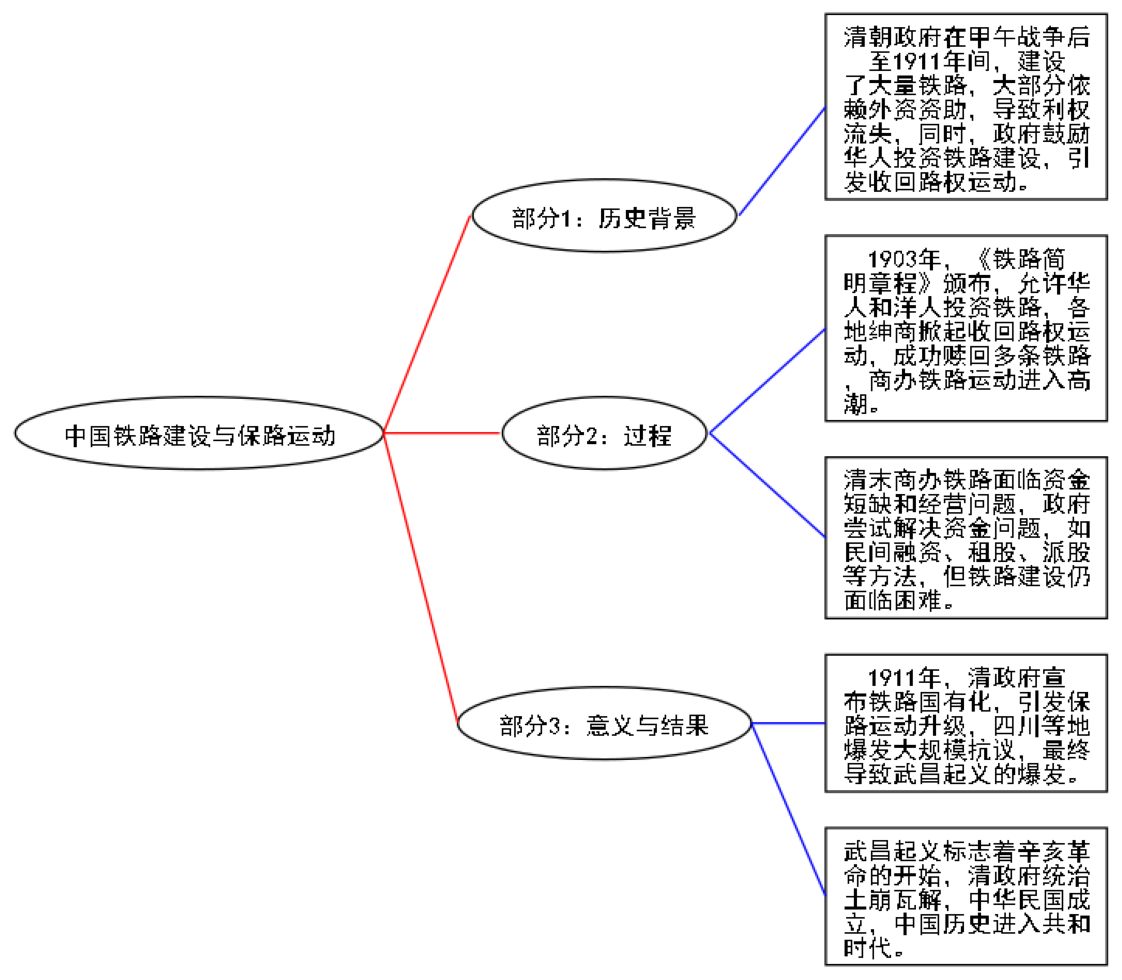

In [127]:
input4="""
## 中心事件:中国铁路建设与保路运动

### 部分1：历史背景
- 清朝政府在甲午战争后至1911年间，建设了大量铁路，大部分依赖外资资助，导致利权流失，同时，政府鼓励华人投资铁路建设，引发收回路权运动。

### 部分2：过程
- 1903年，《铁路简明章程》颁布，允许华人和洋人投资铁路，各地绅商掀起收回路权运动，成功赎回多条铁路，商办铁路运动进入高潮。
- 清末商办铁路面临资金短缺和经营问题，政府尝试解决资金问题，如民间融资、租股、派股等方法，但铁路建设仍面临困难。

### 部分3：意义与结果
- 1911年，清政府宣布铁路国有化，引发保路运动升级，四川等地爆发大规模抗议，最终导致武昌起义的爆发。
- 武昌起义标志着辛亥革命的开始，清政府统治土崩瓦解，中华民国成立，中国历史进入共和时代。

### 结论：
中国铁路建设与保路运动紧密相连，不仅反映了晚清时期铁路建设的复杂历程，也揭示了政治体制转型和社会变革的深层次矛盾。最终，这场运动直接推动了辛亥革命的发生，对中国历史进程产生了深远影响。<|im_end|>
"""
def draw_brace_map(input,save_path='组织图'):
    input=input.replace('<|im_end|>','').replace('\n\n','\n')
    title='组织图'
    dot = Digraph(comment=title,format='png',engine='dot') 
    dot.graph_attr['rankdir'] = 'LR'
    dot.graph_attr['splines'] = 'line'  # 设置节点间的连接线为直线
    dot.attr('node', fontname='simhei', fontsize='12')  # 设置节点默认字体  
    dot.attr('edge', fontname='simhei', fontsize='6')  # 设置边默认字体（如果边上有标签）
    attribute_list=input.split('\n### ')
    root=attribute_list[0].split(':')[-1]
    dot.node(root,root)
    attribute_list=attribute_list[1:-1]
    for i,attribute in enumerate(attribute_list):
        attribute_name=attribute.split('-')[0].split(':')[-1]
        dot.node(attribute_name,attribute_name)
        dot.edge(root,attribute_name,color='red',tailport='e',headport='w',arrowhead='none')
        features=attribute.split('- ')[1:]
        for j,feature in enumerate(features):
            description=feature.replace('\n','')
            description=prepare_text(description.replace(' ',''))
            dot.node(description,description,shape='box')
            dot.edge(attribute_name,description,color='blue',tailport='e',headport='w',arrowhead='none')
    dot.render(save_path, view=False,cleanup=True)
save_path='graph/brace_map'
draw_brace_map(input4,save_path)
show_map(save_path)
    

## Flow Map

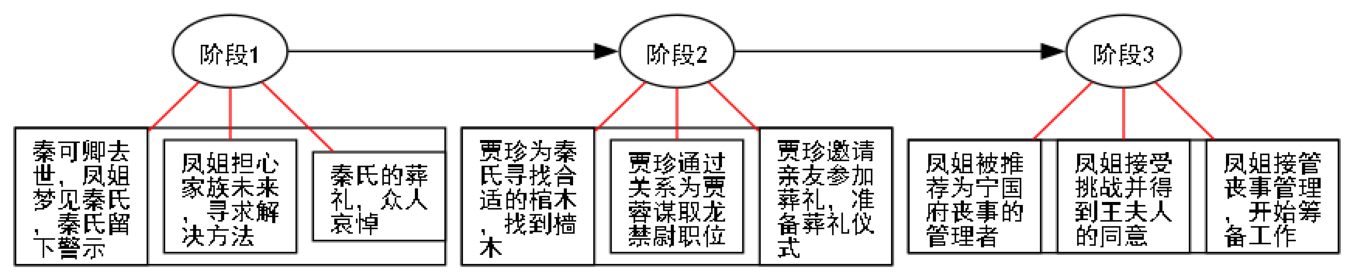

In [123]:
input5=""" ## 阶段1:
 - 子事件1: 秦可卿去世，凤姐梦见秦氏，秦氏留下警示
 - 子事件2: 凤姐担心家族未来，寻求解决方法
 - 子事件3: 秦氏的葬礼，众人哀悼

## 阶段2:
- 子事件1: 贾珍为秦氏寻找合适的棺木，找到樯木
- 子事件2: 贾珍通过关系为贾蓉谋取龙禁尉职位
- 子事件3: 贾珍邀请亲友参加葬礼，准备葬礼仪式

## 阶段3:
- 子事件1: 凤姐被推荐为宁国府丧事的管理者
- 子事件2: 凤姐接受挑战并得到王夫人的同意
- 子事件3: 凤姐接管丧事管理，开始筹备工作<|im_end|>"""
def draw_flow_map(input,save_path='流程图'):
    input=input.replace('<|im_end|>','').replace('\n','')
    title='流程图'
    stage_list=input.split('## ')[1:]
    node_name=['阶段'+str(i+1) for i in range(len(stage_list))]
    things_list=[]
    for stage in stage_list:
        things=[]
        stage_things=stage.split('- ')[1:]
        #print(stage_things)
        for thing in stage_things:
            things.append(thing.split(':')[-1])
        things_list.append(things)
    #print(node_name)
    #print(things_list)
    
    dot = Digraph(comment=title,format='png',engine='neato') 
    #dot.graph_attr['rankdir'] = 'LR'
    #dot.graph_attr['labeljust'] = 'l'
    dot.graph_attr['splines'] = 'True'
    dot.attr('node', fontname='simhei', fontsize='12')  # 设置节点默认字体  
    dot.attr('edge', fontname='simhei', fontsize='10')  # 设置边默认字体（如果边上有标签）  
    #dot.node('r',root)
    for i,name in enumerate(node_name):
        dot.node(str(i), name,pos=f'{i*3+1},2!')
    for i in range(len(node_name)-1):
        dot.edges([str(i)+str(i+1)]) 
    p=0
    for i in range(len(node_name)):
        with dot.subgraph(name=f'cluster_{i}') as c:
            for j,thing in enumerate(things_list[i]):
                thing=prepare_text(thing.replace(' ',''),4)
                c.node(str(i)+str(j),thing,shape='box',pos=f'{i*3+j},1!')
                dot.edge(str(i),str(i)+str(j),color='red',arrowhead='none')
                p+=1
    dot.render(save_path, view=False,cleanup=True) 

save_path='graph/flow_map' 
draw_flow_map(input5,save_path)
show_map(save_path)

## Multi-Flow Map 

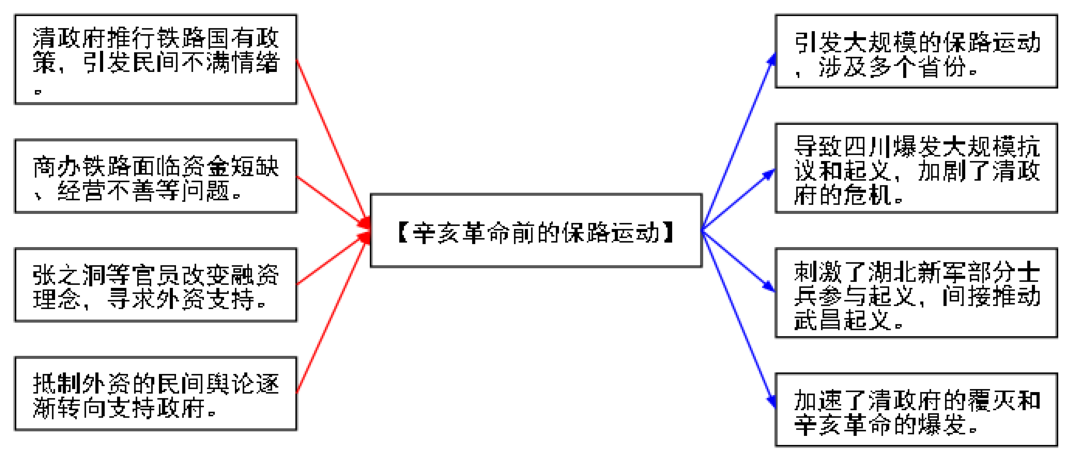

In [124]:
input6="""
## 事件:【辛亥革命前的保路运动】
### 原因：
- 清政府推行铁路国有政策，引发民间不满情绪。
- 商办铁路面临资金短缺、经营不善等问题。
- 张之洞等官员改变融资理念，寻求外资支持。
- 抵制外资的民间舆论逐渐转向支持政府。

### 影响：
- 引发大规模的保路运动，涉及多个省份。
- 导致四川爆发大规模抗议和起义，加剧了清政府的危机。
- 刺激了湖北新军部分士兵参与起义，间接推动武昌起义。
- 加速了清政府的覆灭和辛亥革命的爆发。<|im_end|>
"""

def draw_Multi_Flow_Map(input,save_path='复流程图'):
    input=input.replace('<|im_end|>','').replace('\n\n','\n')
    title='复流程图'
    dot = Digraph(comment=title,format='png',engine='dot') 
    dot.graph_attr['rankdir'] = 'LR' 
    dot.graph_attr['splines'] ='line'
    dot.graph_attr['labeljust'] = 'left'  
    dot.attr('node', fontname='simhei', fontsize='12')  # 设置节点默认字体  
    dot.attr('edge', fontname='simhei', fontsize='6')  # 设置边默认字体（如果边上有标签）
    attribute_list=input.split('\n### ')
    root=attribute_list[0].split(':')[-1]
    dot.node(root,root,shape='box')
    attribute_list=attribute_list[1:]
    for i,attribute in enumerate(attribute_list):
        description_list=attribute.split('- ')[1:]
        for j,description in enumerate(description_list):
            description=prepare_text(description.strip())
            
            if i==0:
                dot.node(description,description,shape='box')
                dot.edge(description,root,color='red',tailport='e',headport='w',arrowsize='0.5')
            else:
                dot.node(description,description,shape='box')
                dot.edge(root,description,color='blue',tailport='e',headport='w',arrowsize='0.5')

    dot.render(save_path, view=False,cleanup=True)
save_path='graph/multi_flow_map'
draw_Multi_Flow_Map(input6,save_path)
show_map(save_path)

## 整合封装

In [14]:
draw_function_dict={
    'bubble_map':draw_Bubble_Map,
    'double_bubble_map':draw_double_Bubble_Map,
    'tree_map':draw_tree_map,
    'brace_map':draw_brace_map,
    'flow_map':draw_flow_map,
    'multi_flow_map':draw_Multi_Flow_Map
}

def read_txt(txt_path):
    with open(txt_path,'r',encoding='utf-8') as f:
        input=f.read()
    return input

def draw_map(map_type,input_or_txt_path,save_path):
    if '.txt' in input_or_txt_path:
        input=read_txt(input_or_txt_path)
    else:
        input=input_or_txt_path
    draw=draw_function_dict[map_type]
    draw(input,save_path)
    show_map(save_path)
def draw_map_by_LLM_respond(map_type,save_path=None):
    input=read_txt(f'LLM_respond\LLM_respond_for_{map_type}.txt')
    draw=draw_function_dict[map_type]
    if save_path==None:
        save_path=f'graph\{map_type}1'
    draw(input,save_path)
    show_map(save_path)


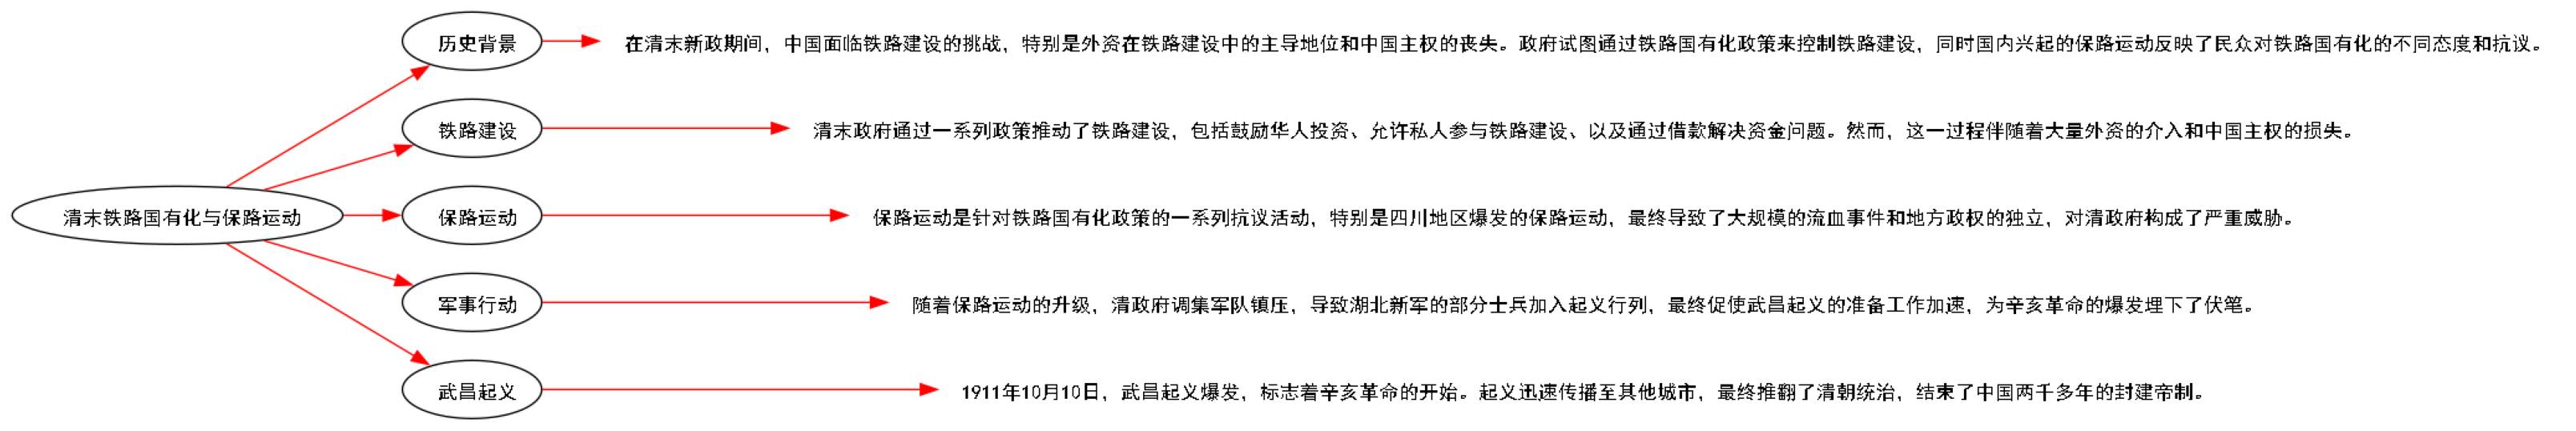

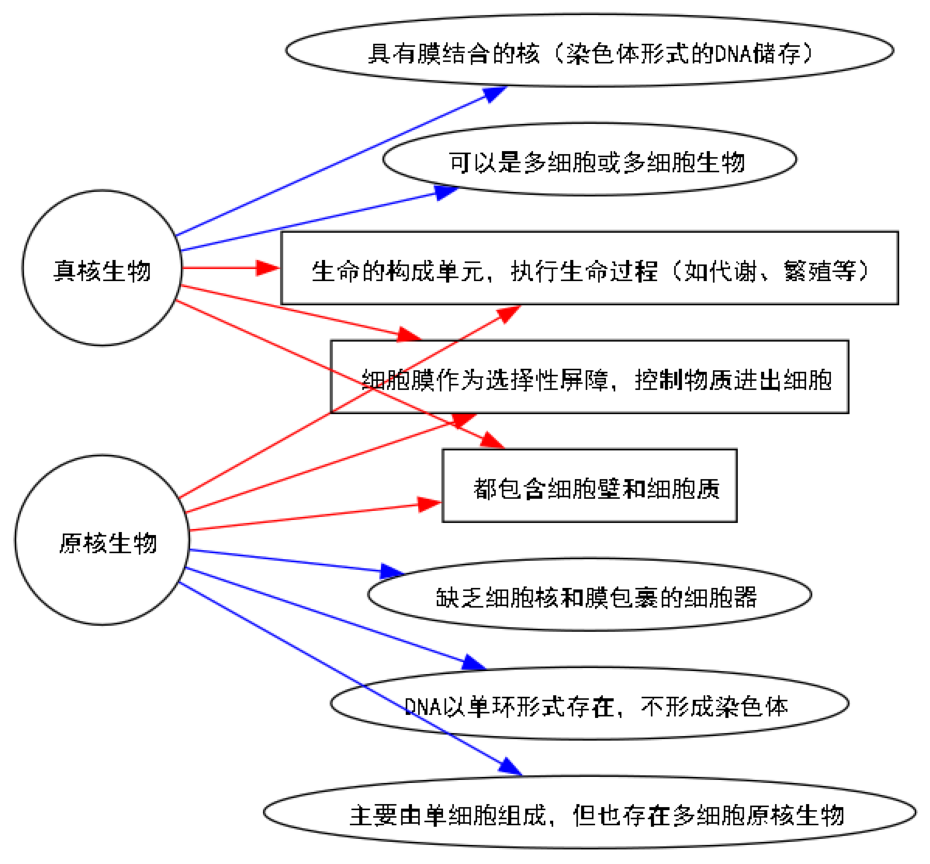

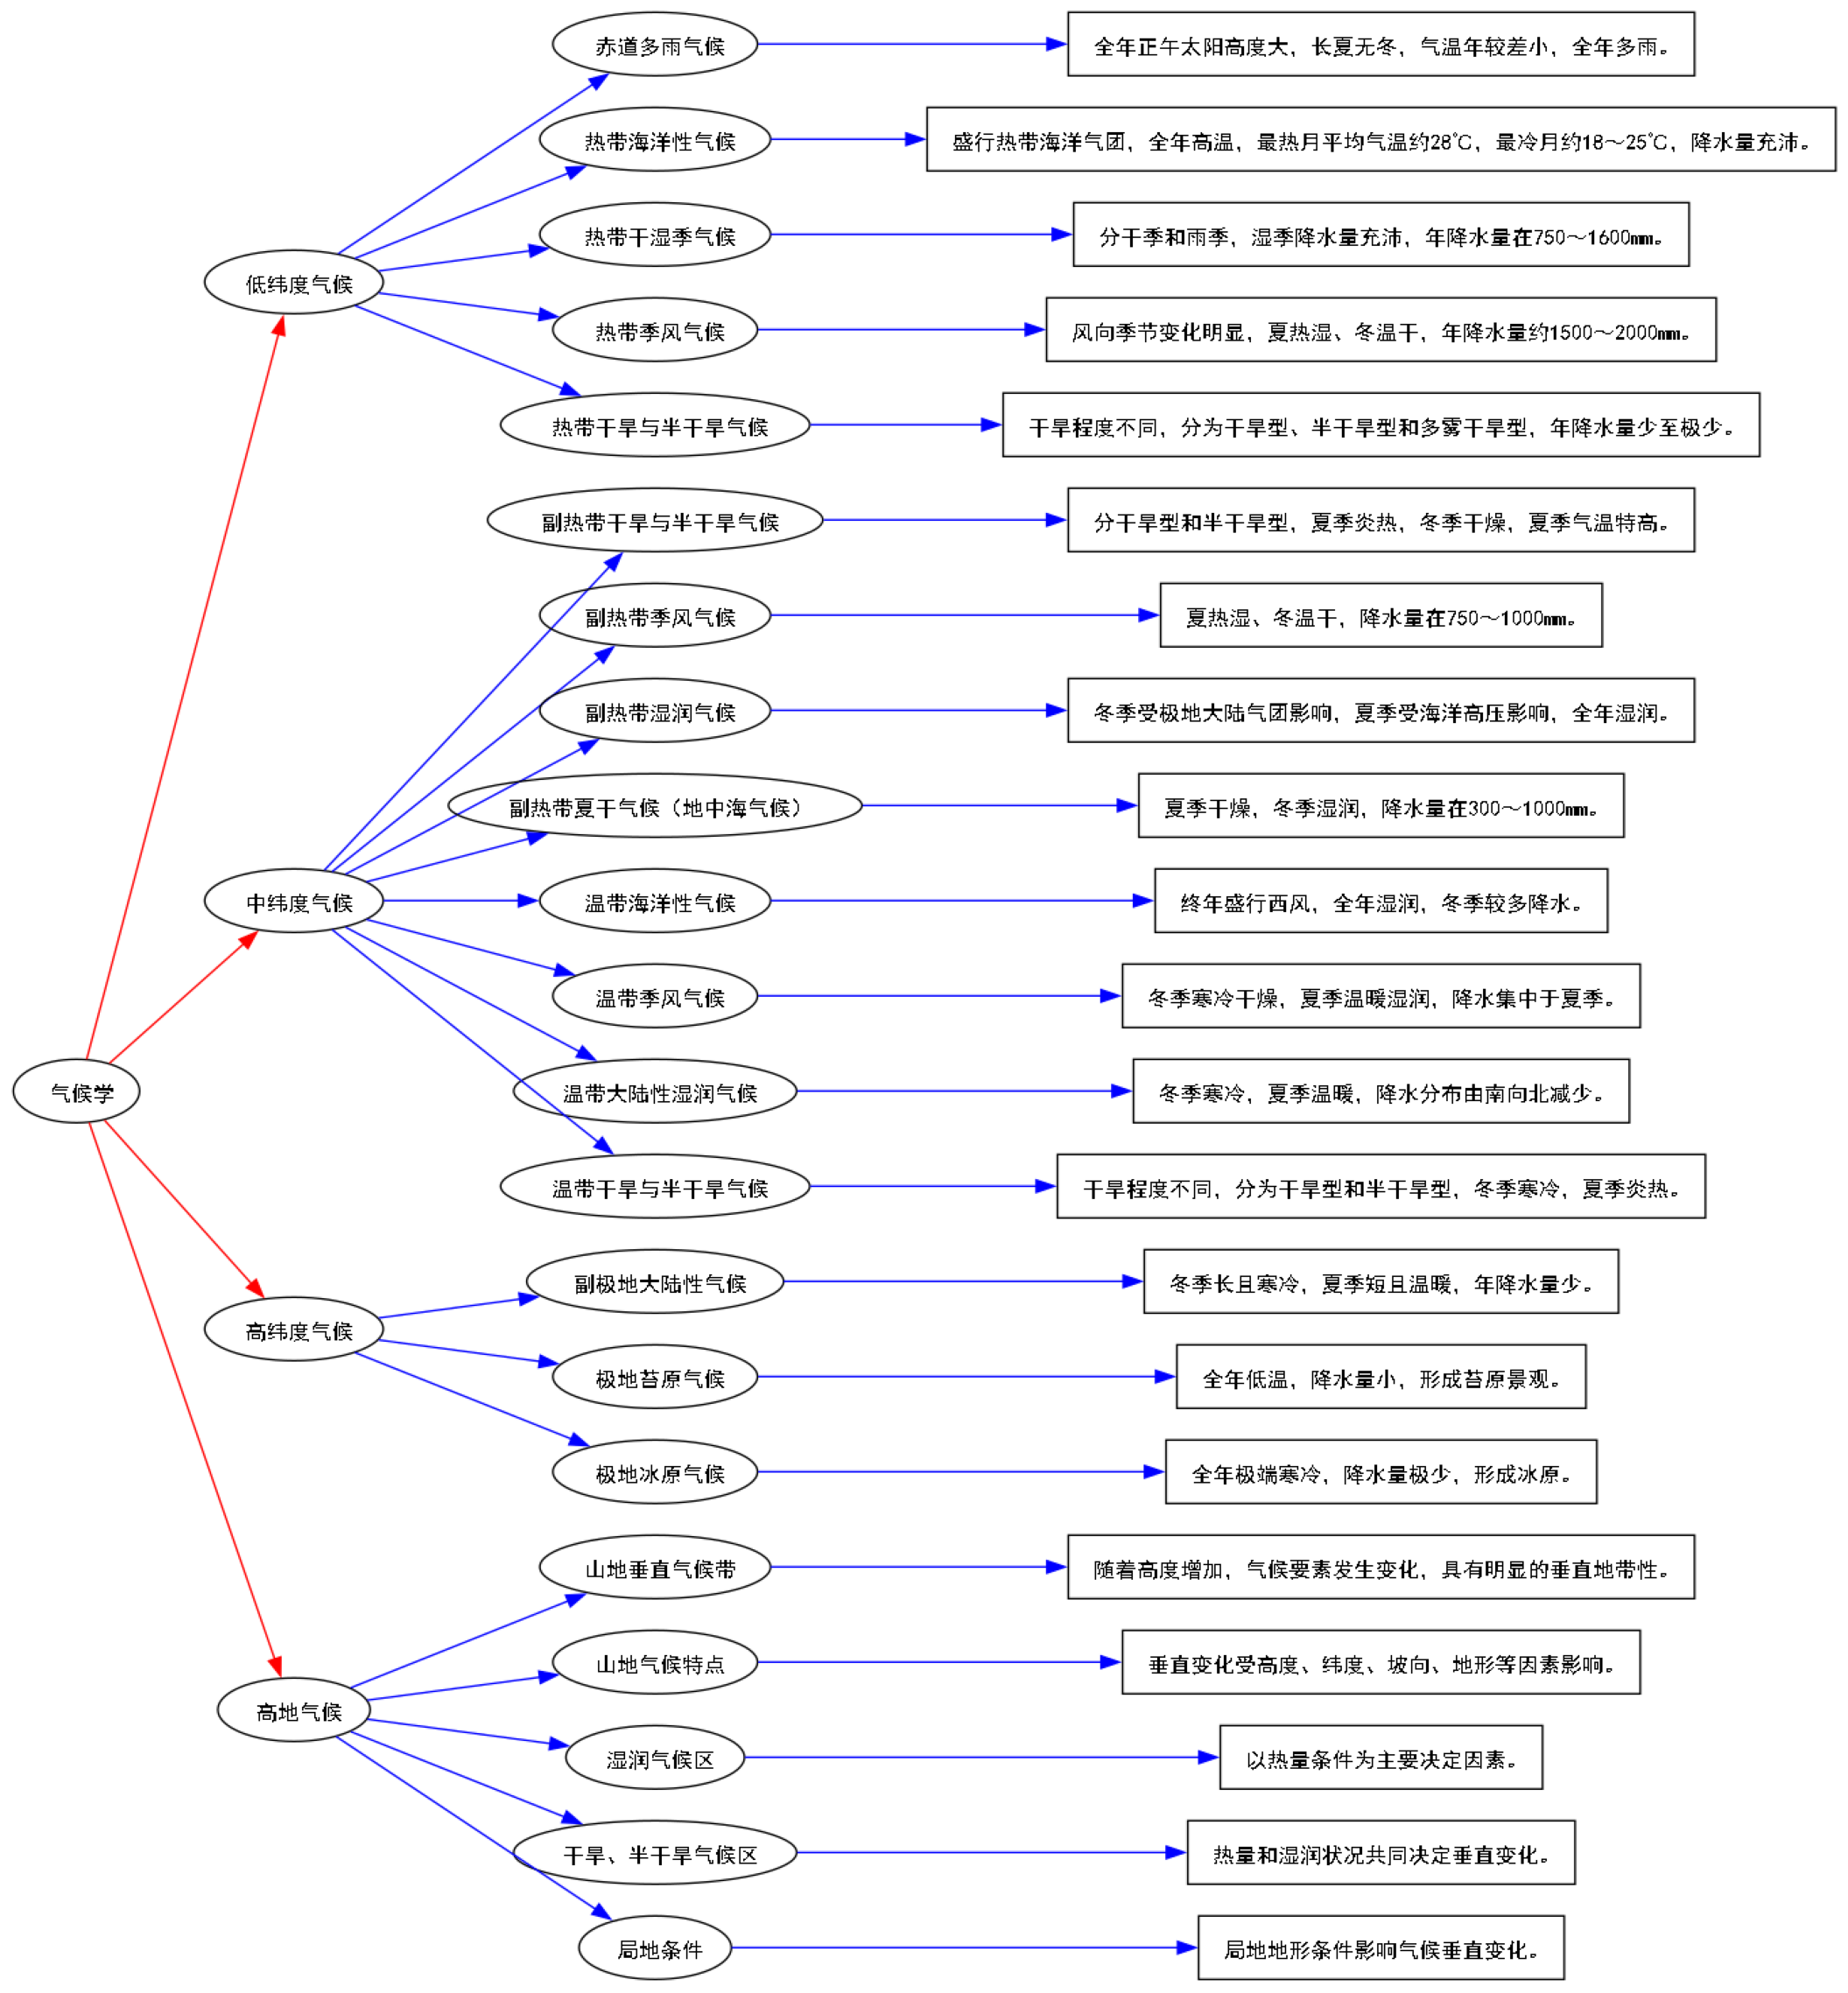

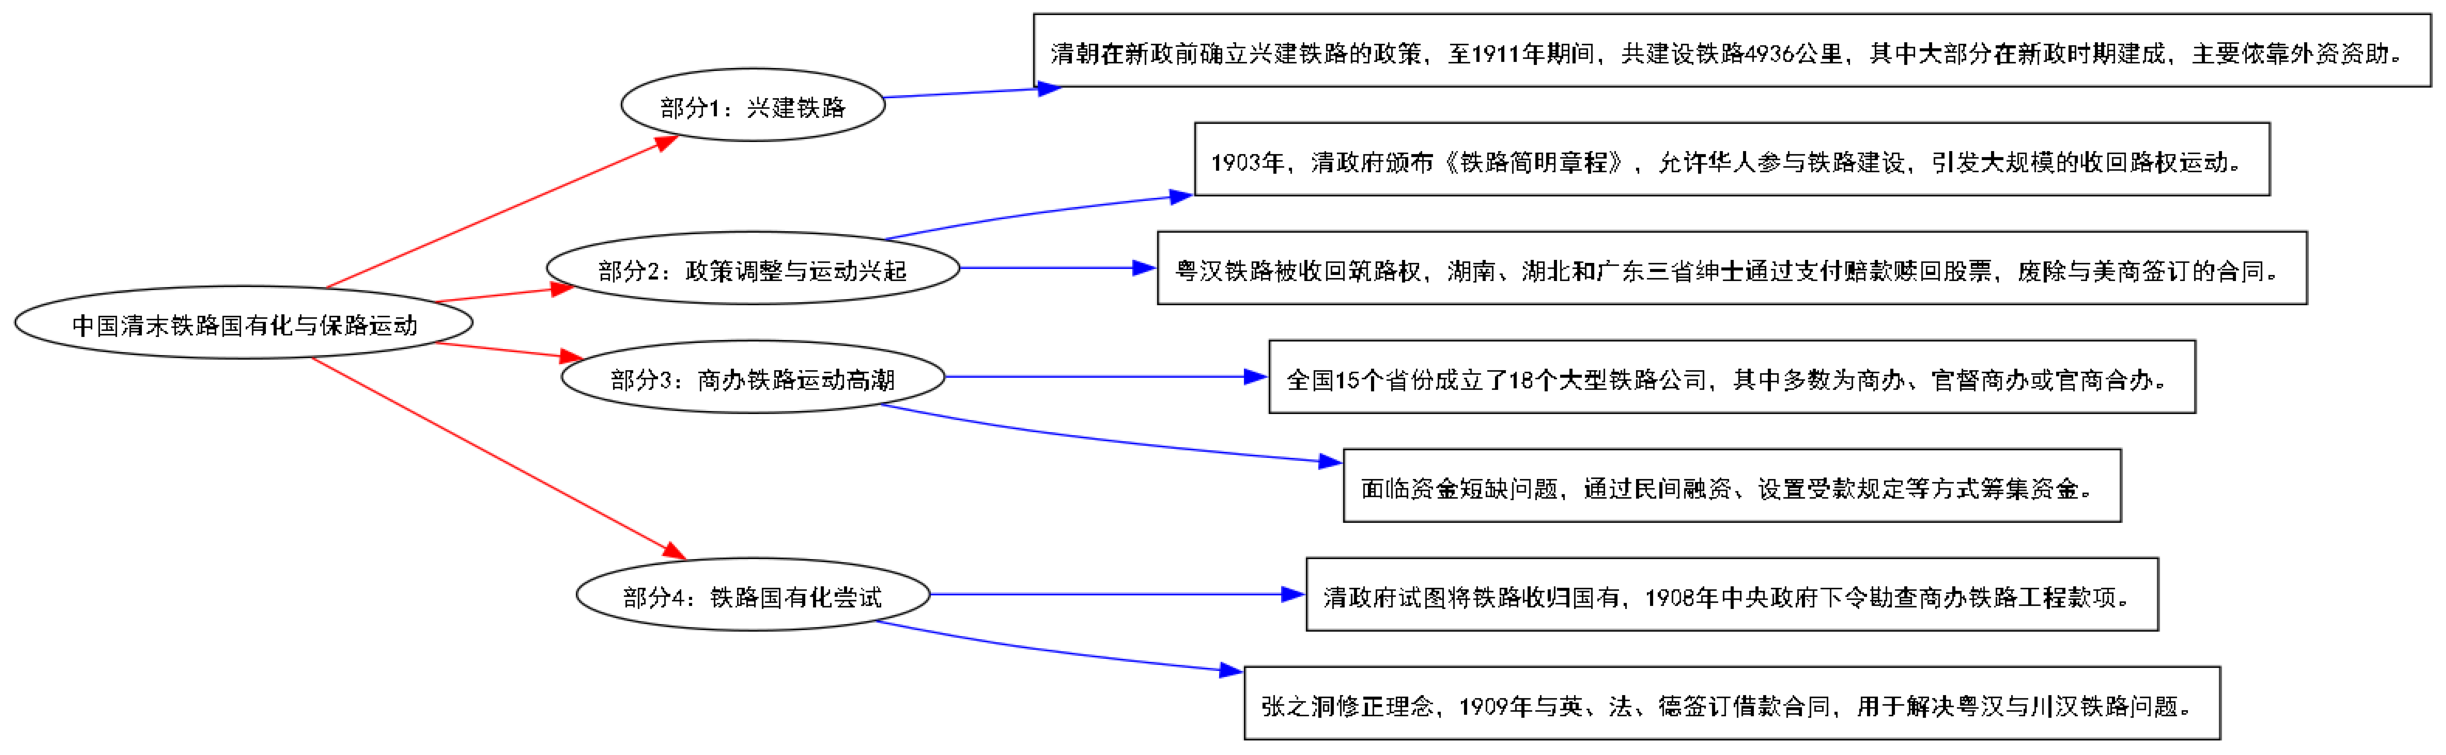

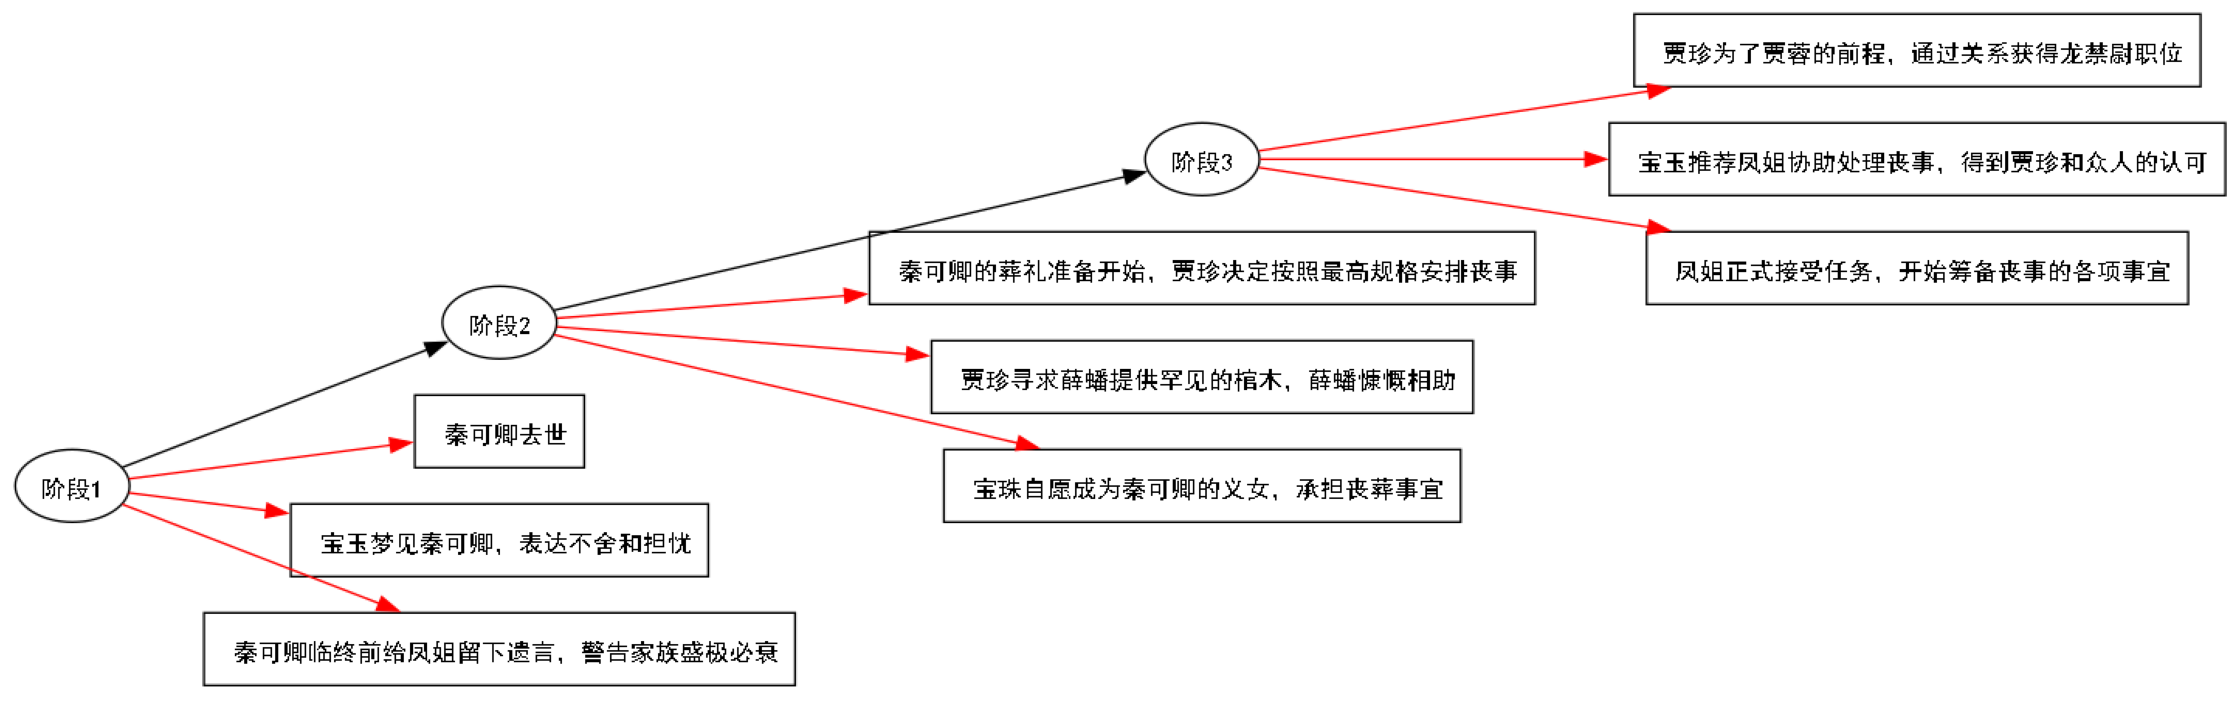

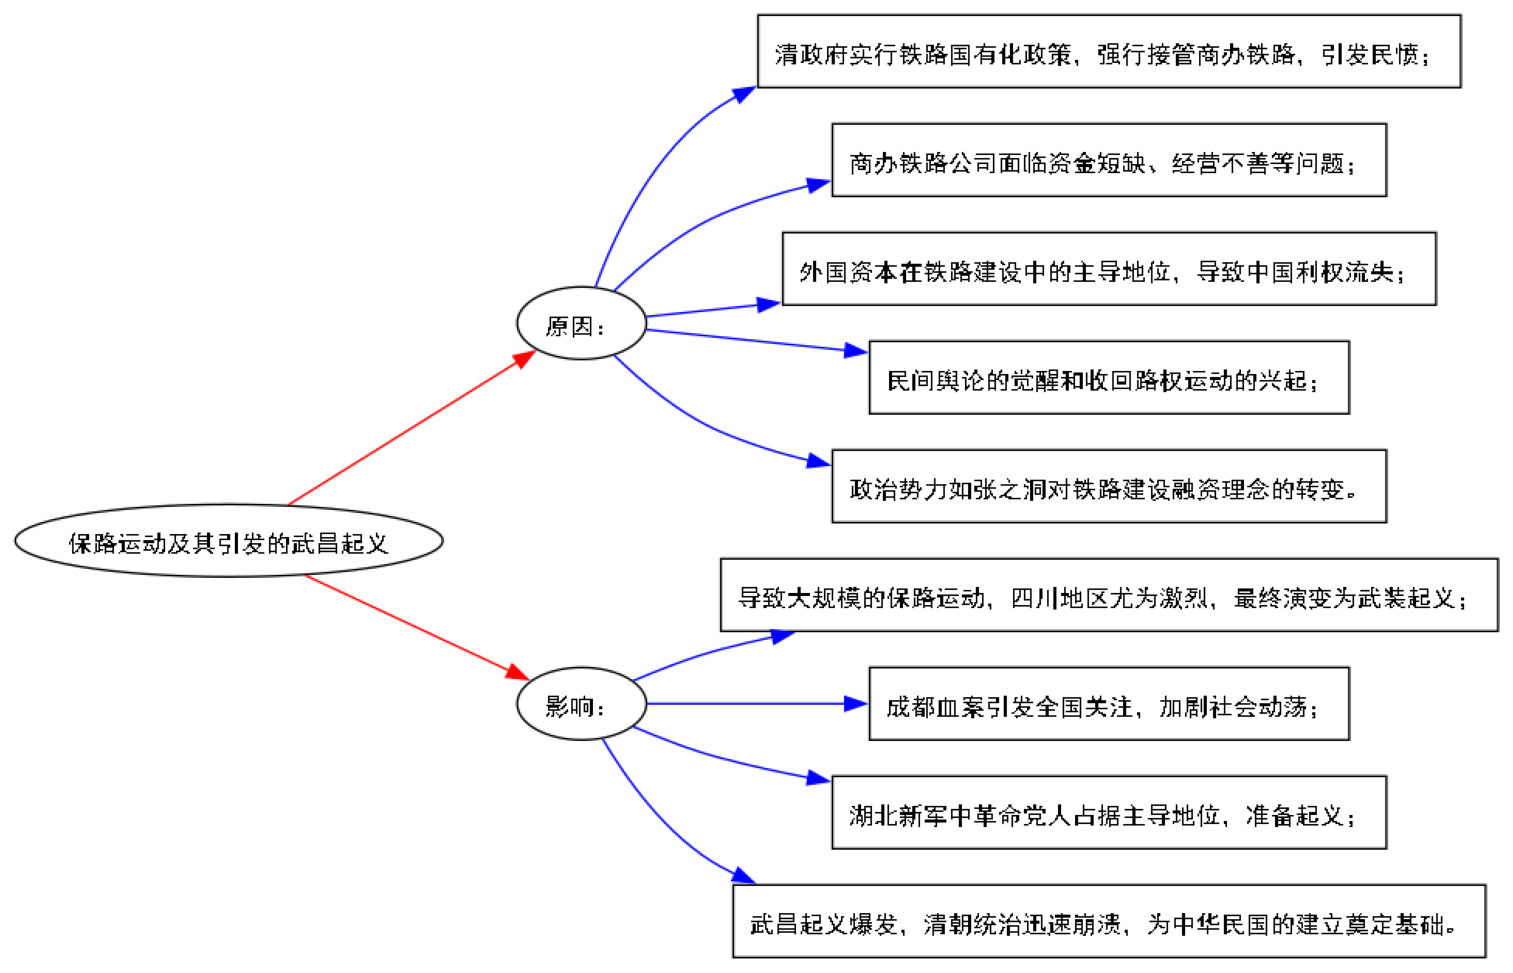

In [16]:
map_type_list=['bubble_map','double_bubble_map','tree_map','brace_map','flow_map','multi_flow_map']
for map_type in map_type_list:
    draw_map_by_LLM_respond(map_type)
